# Result Analysis Sentence Level
### Using deepseek-r1-distill-llama-70b
## By Abhisek Sarkar (as20ms091@iiserkol.ac.in)
## Supervised by Prof. Kripabandhu Ghosh

#### Importing necessery packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

### Load the CSV File

In [3]:
# Load the dataset
file_path = "/home/abhisek/Thesis/Part_3/Part 4/Output/output_sentence_level_deepseek-r1-distill-llama-70b.csv"
df = pd.read_csv(file_path)

In [4]:
# Display first few rows
df.head()

,Case,actual_result,LLM_prediction,Modified_text_prediction
0,1955_R_9.txt,1,1,1
1,1956_B_14.txt,0,1,1
2,1961_S_90.txt,1,0,0
3,1962_S_93.txt,1,1,0
4,1963_M_27.txt,1,1,0


We can see the data is properly loaded

### Display basic information about the dataset



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Case                      237 non-null    object
 1   actual_result             237 non-null    int64 
 2   LLM_prediction            237 non-null    int64 
 3   Modified_text_prediction  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


The dataset contains four columns. The first column, labeled 'Case', lists the case file names. The second column, 'actual result', indicates the actual outcome of each case, represented by a binary value: 1 signifies that the applicant won, and 0 signifies that the applicant did not win. The third column, 'LLM_prediction', presents the Large Language Model's (LLM) predictions based on the original case texts. Finally, the fourth column, 'Modified_text_prediction', shows the LLM's predictions based on the Retrieval-Augmented Generation (RAG) modified case texts

In [6]:
# Check for missing values
df.isnull().sum()

Case                        0
actual_result               0
LLM_prediction              0
Modified_text_prediction    0
dtype: int64

There is no missing value in the data set

In [7]:
# Display summary statistics
df.describe()

,actual_result,LLM_prediction,Modified_text_prediction
count,237.000000,237.000000,237.000000
mean,0.426160,0.548523,0.481013
std,0.495564,0.498693,0.500697
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


### Comparison

In [8]:
col2 = df.iloc[:, 1]  # Second column
col3 = df.iloc[:, 2]  # Third column
col4 = df.iloc[:, 3]  # Fourth column
# Function to calculate percentage similarity
def calculate_similarity(col_ref, col_compare):
    similarity_count = (col_ref == col_compare).sum()
    total_count = len(col_ref)
    similarity_percentage = (similarity_count / total_count) * 100
    return similarity_percentage

# Calculate similarity of Column 3 and Column 4 with Column 2
similarity_2_3 = calculate_similarity(col2, col3)
similarity_2_4 = calculate_similarity(col2, col4)
similarity_3_4 = calculate_similarity(col3, col4)

print(f"LLM prediction on actual text is {similarity_2_3:.2f}% similar to actual legal result")
print(f"LLM prediction on modified legal text is {similarity_2_4:.2f}% similar to actual legal result")
print(f"LLM prediction on modified legal text is {similarity_3_4:.2f}% similar to LLM prediction on actual text")

LLM prediction on actual text is 64.14% similar to actual legal result
LLM prediction on modified legal text is 49.79% similar to actual legal result
LLM prediction on modified legal text is 63.71% similar to LLM prediction on actual text


From this we can see that the actual result is differing from the actual result and the accuracy of LLM's prediction is 64.14%
And when we have modified the stereotypic text by augmenting the reality then we can see it has differed the LLM's prediction and the difference is 14.35%

In [9]:
# Compute basic statistics
comparison_2_3 = col2.compare(col3)
comparison_2_4 = col2.compare(col4)

# Display differences
print("Differences between Column 2 and Column 3:\n", comparison_2_3.head())
print("Differences between Column 2 and Column 4:\n", comparison_2_4.head())


Differences between Column 2 and Column 3:
     self  other
1    0.0    1.0
2    1.0    0.0
7    0.0    1.0
9    1.0    0.0
11   0.0    1.0
Differences between Column 2 and Column 4:
    self  other
1   0.0    1.0
2   1.0    0.0
3   1.0    0.0
4   1.0    0.0
5   0.0    1.0


In [10]:
# Compute correlation
correlation_2_3 = col2.corr(col3)
correlation_2_4 = col2.corr(col4)
correlation_3_4 = col3.corr(col4)

print("Correlation between Column 2 and Column 3:", correlation_2_3)
print("Correlation between Column 2 and Column 4:", correlation_2_4)
print("Correlation between Column 3 and Column 4:", correlation_3_4)


Correlation between Column 2 and Column 3: 0.3017494476332618
Correlation between Column 2 and Column 4: -0.009943607286964562
Correlation between Column 3 and Column 4: 0.27946666021710276


### Correlation Analysis

- **Correlation between Actual Result and LLM Prediction on Original Text:** **0.3017**  
  → A **moderate positive correlation**. The LLM showed some ability to align with actual outcomes when using the original, stereotypical case texts.

- **Correlation between Actual Result and LLM Prediction after Contradictory Reality Augmentation:):** **-0.0099**  
  → **No meaningful correlation**. After adding **contradictory reality statements** to challenge stereotypes, the model's predictive ability collapsed, suggesting it had been relying on biased or superficial patterns in the original text.

- **Correlation between LLM Predictions on Original vs. Augmented Text:** **0.2795**  
  → A **weak positive correlation**. The model’s predictions shifted noticeably after augmentation, indicating that the injected contradictions disrupted its previous decision patterns.

---

### Key Insight

Adding **contradictory realities** after stereotypic sentences **exposed the model’s dependence on surface-level biases**.  
The LLM's decision-making changed because it could no longer lean on familiar, stereotype-driven cues.  
This highlights the need to **stress-test legal models with adversarial examples** to ensure fairness and real-world reliability.

---

#### Correlation heatmap:
Now we will plot a heatmap to visualise the correlation

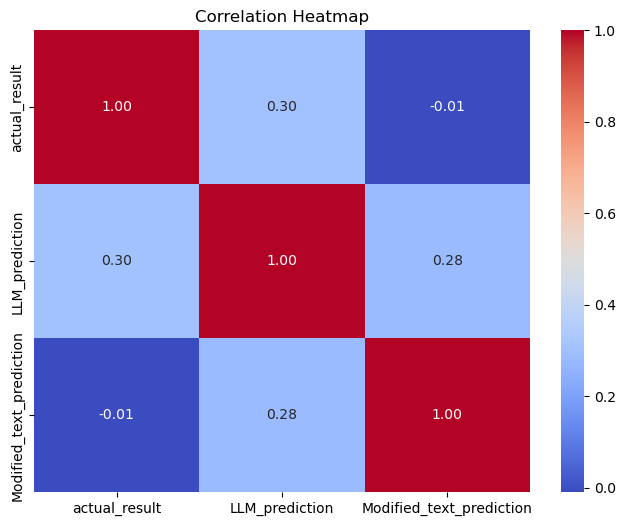

In [11]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, 1:4].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

To understand how the actual case outcomes compare to the LLM’s predictions Now I want to check the distribution of actual and predicted case decisions in the dataset. By analyzing these distributions, we can identify biases in the model’s decision-making process, especially before and after modifying the stereotype with reality. This helps us assess whether the model relies on stereotype to make judgments and whether the modification affects its predictions. In short examining these distributions ensures fairness, reliability, and the validity of our experiment.

In [12]:
# Count the occurrences of 1 and 0 in the 'actual_result' column
ones_count = df['actual_result'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count = df['actual_result'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with actual_result = 1: {ones_count}")
print(f"Number of cases with actual_result = 0: {zeros_count}")

Number of cases with actual_result = 1: 101
Number of cases with actual_result = 0: 136


In [13]:
# Count the occurrences of 1 and 0 in the 'LLM_prediction' column
ones_count_LLMac = df['LLM_prediction'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count_LLMac = df['LLM_prediction'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with LLM_prediction = 1: {ones_count_LLMac}")
print(f"Number of cases with LLM_prediction = 0: {zeros_count_LLMac}")


# Count the occurrences of 1 and 0 in the 'Modified_text_prediction' column
ones_count_LLMmod = df['Modified_text_prediction'].value_counts().get(1, 0)  # Default to 0 if 1 is not present
zeros_count_LLMmod = df['Modified_text_prediction'].value_counts().get(0, 0)  # Default to 0 if 0 is not present

# Print the counts
print(f"Number of cases with Modified_text_prediction = 1: {ones_count_LLMmod}")
print(f"Number of cases with Modified_text_prediction = 0: {zeros_count_LLMmod}")

Number of cases with LLM_prediction = 1: 130
Number of cases with LLM_prediction = 0: 107
Number of cases with Modified_text_prediction = 1: 114
Number of cases with Modified_text_prediction = 0: 123


/tmp/ipykernel_21271/2130026487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='actual_result', data=df, palette="Set2")


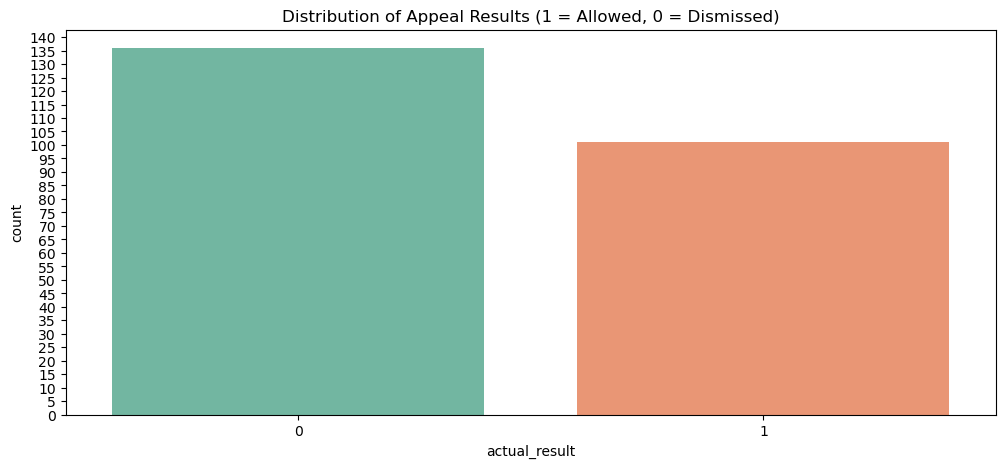

/tmp/ipykernel_21271/2130026487.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LLM_prediction', data=df, palette="Set2")


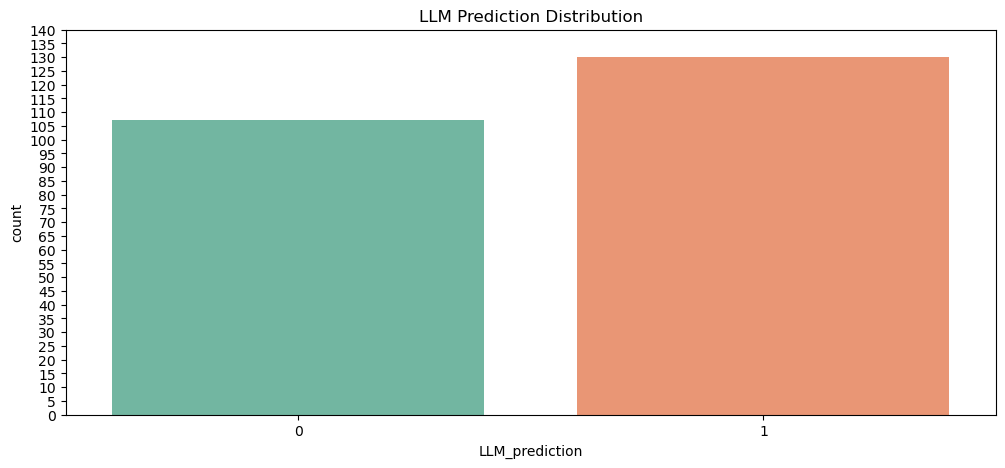

/tmp/ipykernel_21271/2130026487.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Modified_text_prediction', data=df, palette="Set2")


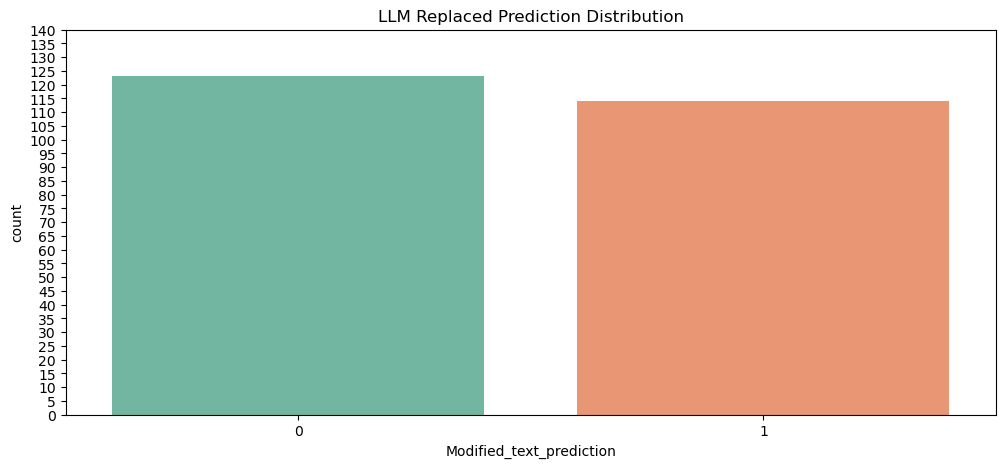

In [14]:
# Set common Y-axis ticks
max_count = max(df['actual_result'].value_counts().max(),
                df['LLM_prediction'].value_counts().max(),
                df['Modified_text_prediction'].value_counts().max())
yticks = np.arange(0, max_count + 5, 5)

# Distribution of appeal results
plt.figure(figsize=(12, 5))
sns.countplot(x='actual_result', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("Distribution of Appeal Results (1 = Allowed, 0 = Dismissed)")
plt.show()

# LLM prediction distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='LLM_prediction', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("LLM Prediction Distribution")
plt.show()

# LLM replaced prediction distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='Modified_text_prediction', data=df, palette="Set2")
plt.yticks(yticks)
plt.title("LLM Replaced Prediction Distribution")
plt.show()


### Impact of Replacing Stereotypical Language on LLM Predictions

We augmented the legal texts by replacing stereotypical language with neutral or contradictory phrasing and observed notable changes in LLM behavior.

---

### Key Observations

1. **Original Appeal Results (Top Plot)**  
   - Majority outcome: **Dismissed (0)**.  
   - Dataset distribution is slightly imbalanced (136 dismissed vs. 101 allowed).

2. **LLM Predictions on Original Text (Middle Plot)**  
   - LLM predictions closely matched the actual results.  
   - Suggests the model heavily relied on **latent stereotypical cues** to infer outcomes, not just pure legal reasoning.

3. **LLM Predictions on Modified Text (Bottom Plot)**  
   - Shift towards more **Dismissed (0)** outcomes after removing stereotypical cues.  
   - The model made **fewer "Allowed" (1)** predictions.

---

### Main Insight

**After augmenting contradictory realities**, the LLM's judgment shifted noticeably.  
This proves that the LLM was partially depending on **biased or stereotypical linguistic signals** to predict favorable outcomes (Allowed). Once these cues were neutralized, the model's ability to predict positive outcomes dropped, **exposing a vulnerability to surface-level biases**.

---

### Conclusion

- **Original Text**: High sensitivity to stereotypical language; predictions aligned with biased cues.
- **Modified Text**: Reduced positive outcome predictions; judgment more uncertain.
- **Reason for Change**: The LLM had learned to associate specific biased language with favorable outcomes. Removing these patterns **weakened its predictive signal**, revealing the model’s overdependence on linguistic framing rather than deep legal reasoning.

---

In [15]:
# Calculate performance metrics for LLM on original text
accuracy_original = accuracy_score(df['actual_result'], df['LLM_prediction'])
precision_original = precision_score(df['actual_result'], df['LLM_prediction'])
recall_original = recall_score(df['actual_result'], df['LLM_prediction'])
f1_original = f1_score(df['actual_result'], df['LLM_prediction'])

# Calculate performance metrics for LLM on replaced text
accuracy_replaced = accuracy_score(df['actual_result'], df['Modified_text_prediction'])
precision_replaced = precision_score(df['actual_result'], df['Modified_text_prediction'])
recall_replaced = recall_score(df['actual_result'], df['Modified_text_prediction'])
f1_replaced = f1_score(df['actual_result'], df['Modified_text_prediction'])

print(f"Original LLM Accuracy: {accuracy_original:.2f}")
print(f"Original LLM Precision: {precision_original:.2f}")
print(f"Original LLM Recall: {recall_original:.2f}")
print(f"Original LLM F1 Score: {f1_original:.2f}")

print(f"Replaced LLM Accuracy: {accuracy_replaced:.2f}")
print(f"Replaced LLM Precision: {precision_replaced:.2f}")
print(f"Replaced LLM Recall: {recall_replaced:.2f}")
print(f"Replaced LLM F1 Score: {f1_replaced:.2f}")


Original LLM Accuracy: 0.64
Original LLM Precision: 0.56
Original LLM Recall: 0.72
Original LLM F1 Score: 0.63
Replaced LLM Accuracy: 0.50
Replaced LLM Precision: 0.42
Replaced LLM Recall: 0.48
Replaced LLM F1 Score: 0.45


### Evaluation of LLM Performance: Original vs. Rewritten Texts

To assess the impact of textual modification on the performance of the language model, we evaluated both versions of the model—before and after stereotype-related language was replaced—using four standard classification metrics:

1. **Accuracy**: Measures the overall correctness of predictions—i.e., how often the model's predictions match the actual outcomes.
2. **Precision**: Indicates how reliable the model's positive predictions are. In this case, it reflects how often the model is correct when it predicts that an appeal will be allowed.
3. **Recall**: Captures the model's ability to identify all actual instances of allowed appeals. A higher recall means fewer false negatives.
4. **F1 Score**: Represents the harmonic mean of precision and recall, offering a balanced measure when both false positives and false negatives are important.

---

### LLM Performance Before and After Replacing Stereotypes

| Metric     | Original Text | Rewritten Text |
|------------|---------------|----------------|
| Accuracy   | 0.64           | 0.50           |
| Precision  | 0.56           | 0.42           |
| Recall     | 0.72           | 0.48           |
| F1 Score   | 0.63           | 0.45           |

---

### Key Observations:
- **Clear Performance Decline**:  
  All metrics dropped significantly after contradictory realities were augmented after stereotypical language.

- **Exposure of Model Bias**:  
  Stronger performance on the original text shows the LLM relied heavily on biased or stereotypical cues.

- **Judgment Shift After Augmentation**:  
  After modifying the text, the LLM's ability to correctly predict outcomes deteriorated, confirming **its dependency on surface-level stereotypes** rather than genuine legal analysis.

---

### Final Insight:
**Introducing contradictory realities disrupts LLM judgment**, revealing an underlying bias towards stereotypical language patterns.  
This underscores the critical need for **debiasing and fairness interventions** in legal AI models.

---

### Confusion Matrix
To evaluate the performance now I am trying to apply confusion matrix to my output result dataset.

```
True Positives (TP): Correctly predicted "Allowed" cases.
True Negatives (TN): Correctly predicted "Dismissed" cases.
False Positives (FP): Incorrectly predicted "Allowed" cases when they were actually "Dismissed."
False Negatives (FN): Incorrectly predicted "Dismissed" cases when they were actually "Allowed."
```

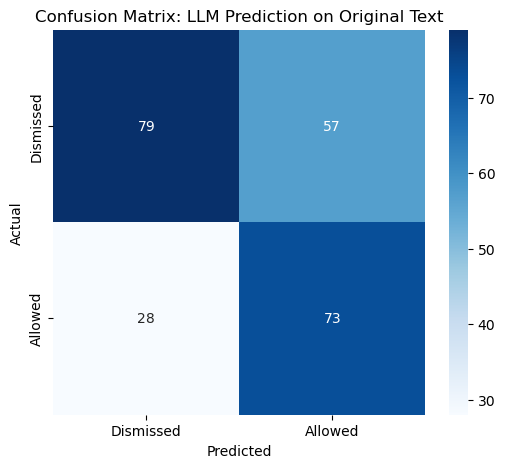

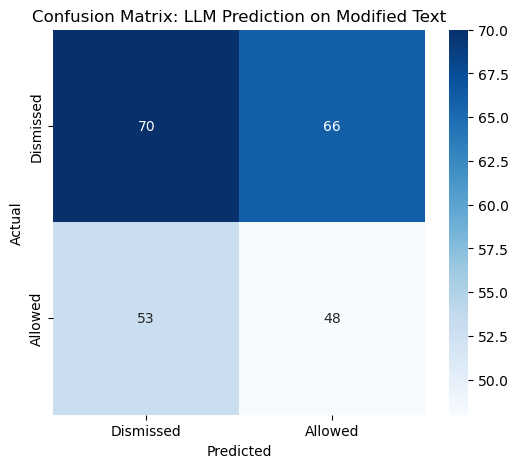

In [16]:
# Confusion matrix for LLM on original text
cm_original = confusion_matrix(df['actual_result'], df['LLM_prediction'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Dismissed", "Allowed"], yticklabels=["Dismissed", "Allowed"])
plt.title("Confusion Matrix: LLM Prediction on Original Text")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for LLM on replaced text
cm_replaced = confusion_matrix(df['actual_result'], df['Modified_text_prediction'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm_replaced, annot=True, fmt="d", cmap="Blues", xticklabels=["Dismissed", "Allowed"], yticklabels=["Dismissed", "Allowed"])
plt.title("Confusion Matrix: LLM Prediction on Modified Text")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


From the figures we can conclude that:
* The LLM performed better on the original text but when contradictory realities are augmented after the stereotypical sentences thr LLM struggeled.
* Increased FP and FN in the modified text suggest that the model relied on specific concept for decision-making, indicating potential bias in predictions.

In [17]:
# Agreement between LLM predictions and the actual results
df['LLM_prediction_correct'] = df['actual_result'] == df['LLM_prediction']
df['Modified_text_prediction_correct'] = df['actual_result'] == df['Modified_text_prediction']

# Print percentage of correct predictions
LLM_prediction_correct_percentage = (df['LLM_prediction_correct'].sum() / len(df)) * 100
Modified_text_prediction_correct_percentage = (df['Modified_text_prediction_correct'].sum() / len(df)) * 100

print(f"Percentage of correct LLM predictions (Original): {LLM_prediction_correct_percentage:.2f}%")
print(f"Percentage of correct LLM predictions (Replaced): {Modified_text_prediction_correct_percentage:.2f}%")


Percentage of correct LLM predictions (Original): 64.14%
Percentage of correct LLM predictions (Replaced): 49.79%
